<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>

---

# Assignment 3

by Nindya Eka Apsari

PYTN-KS002

Studi Independen - Kampus Merdeka

## Project Overview

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.


There are four datasets:

bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


This dataset contains:

Input variables:


BANK CLIENT DATA:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no', 'yes', 'unknown')

6 - housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

7 - loan: has personal loan? (categorical: 'no', 'yes', 'unknown')


RELATE WITH THE LAST CONTACT OF THE CURRENT CAMPAIGN:

8 - contact: contact communication type (categorical: 'cellular', 'telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


OTHER ATTRIBUTES:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')


SOCIAL AND ECONOMIC CONTEXT ATTRIBUTES:

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)


OUTPUT VARIABLE (DESIRED TARGET):

21 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')

## Data Preparation

Before we start, we have to import the libraries that we going to use.

In [1]:
import numpy as np
import pandas as pd
import random
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV

Dataset is about Bank Marketing, [Download Here](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

Dataset file must in the same folder with this file to run this code for importing datasets using Pandas.

In [2]:
df=pd.read_csv("bank-additional-full.csv",sep=';')


print('Dataset is ready!')

Dataset is ready!


View the top 5 rows of dataset

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


View the bottom 5 rows of dataset

In [4]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


View all columns and data type

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

View shape of dataset

In [6]:
df.shape

(41188, 21)

View header list

In [7]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

## EDA and Pre-Processing

Make barplot for categorical variables

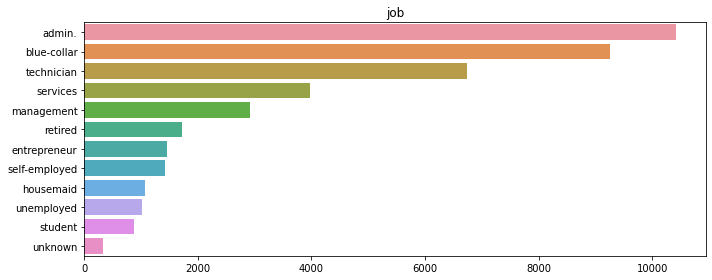

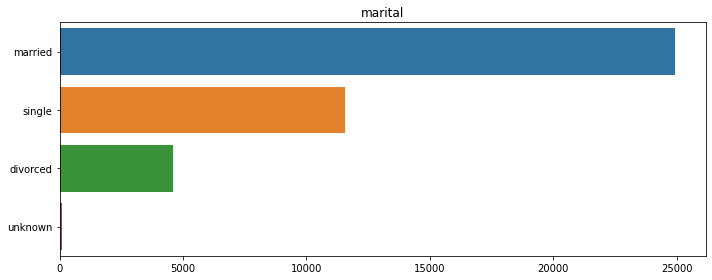

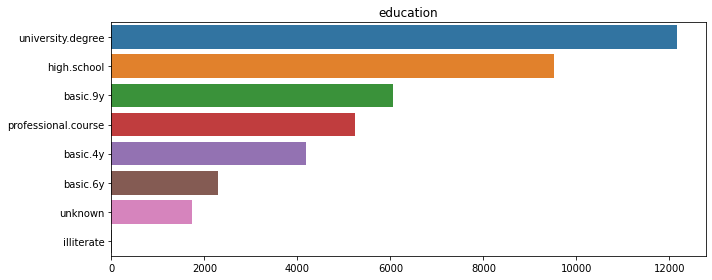

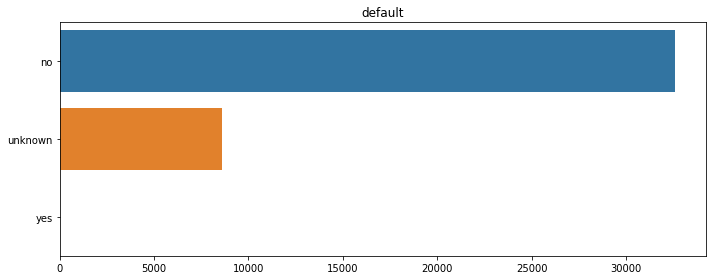

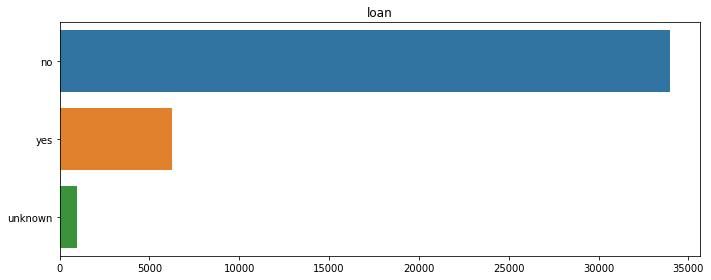

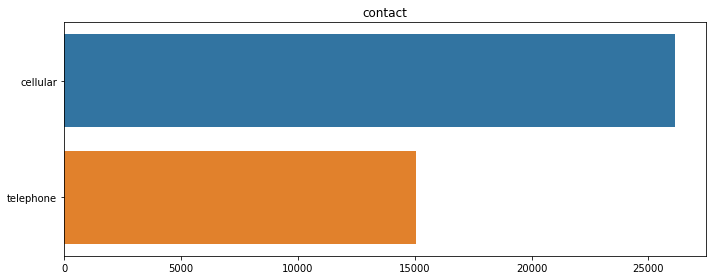

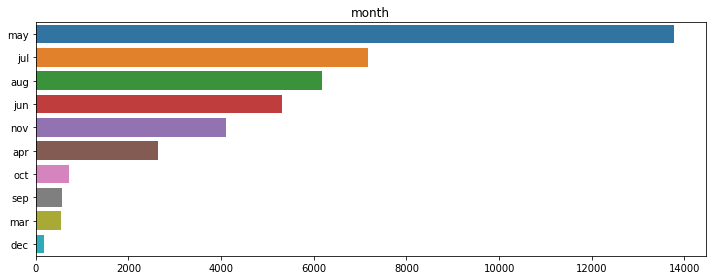

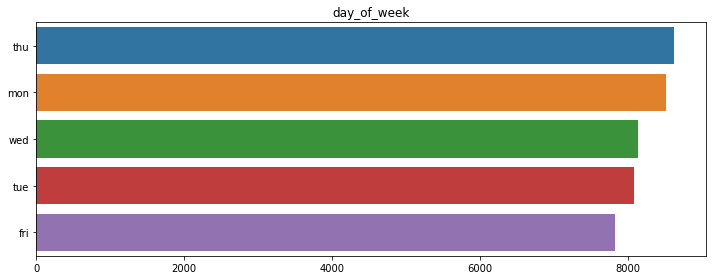

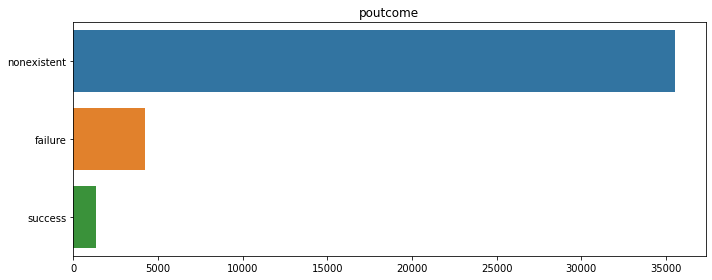

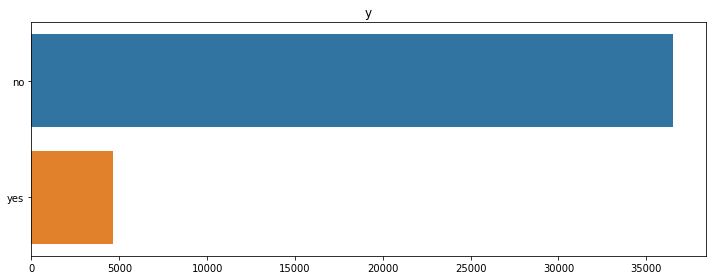

In [8]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

Make barplot for each were produced that looked at their relative frequency as well as normalized relative frequency

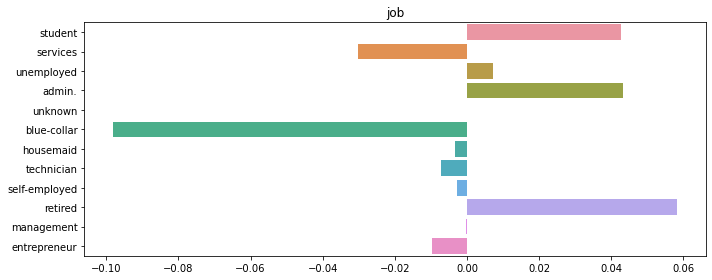

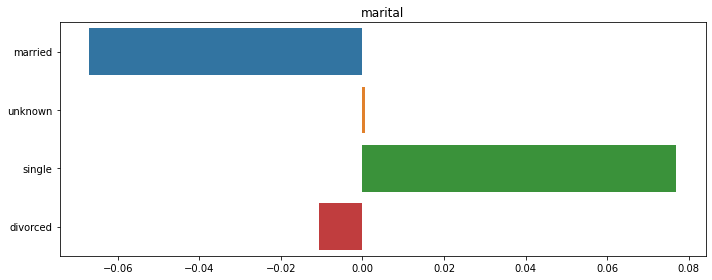

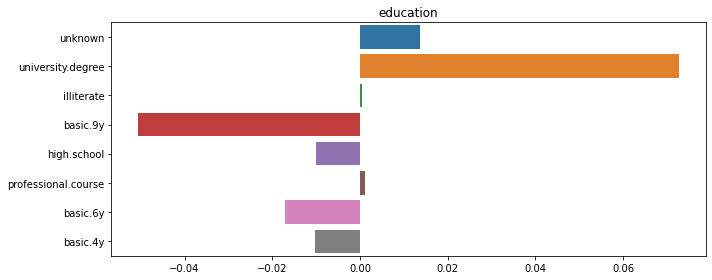

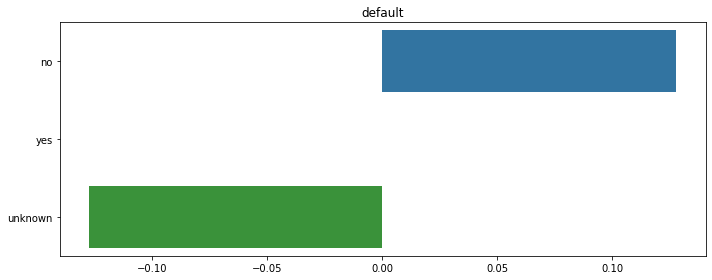

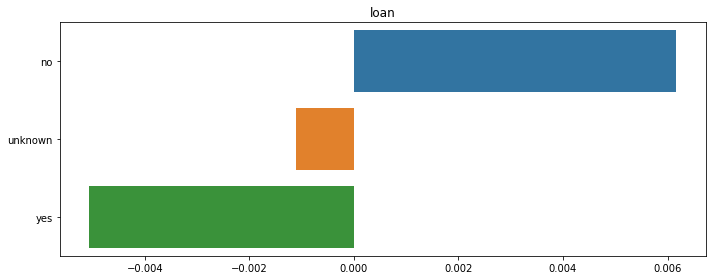

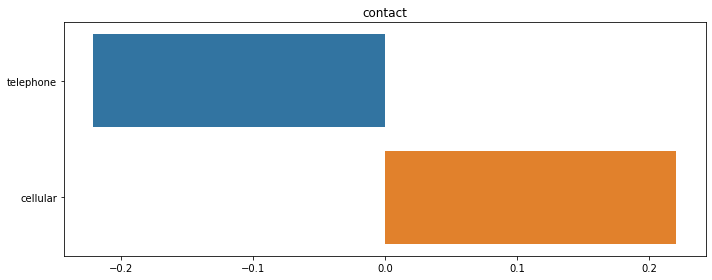

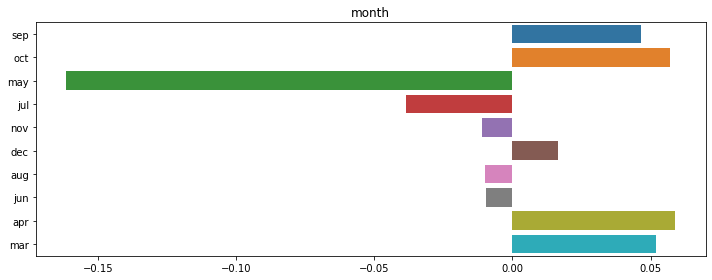

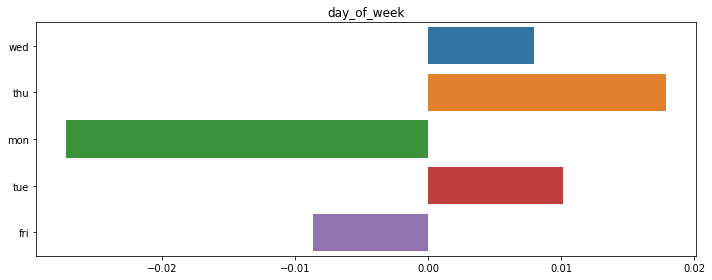

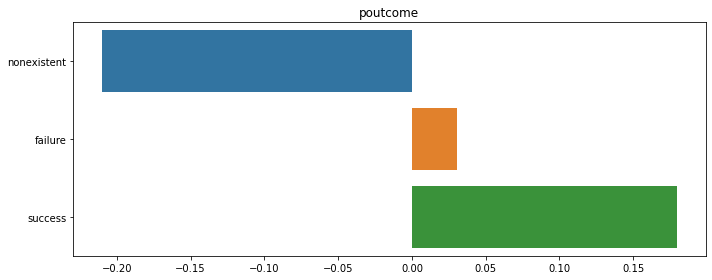

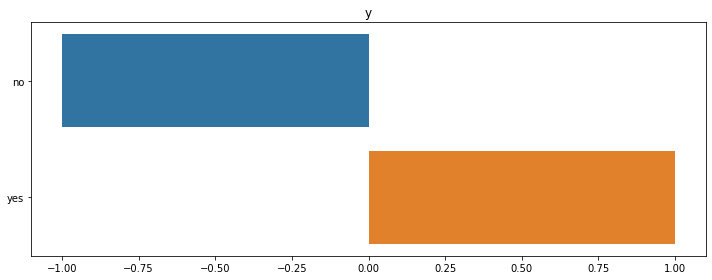

In [9]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    #Returns counts of unique values for each outcome for each feature.
    pos_counts = df.loc[df.y.values == 'yes', col].value_counts() 
    neg_counts = df.loc[df.y.values == 'no', col].value_counts()
    
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
    #Counts of how often each outcome was recorded.
    freq_pos = (df.y.values == 'yes').sum()
    freq_neg = (df.y.values == 'no').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()

Make pie chart for target variable

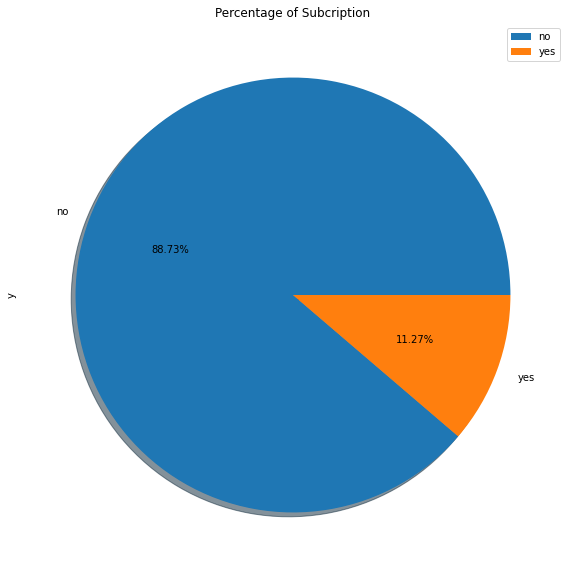

In [10]:
plt.figure(figsize=(10,10))
df['y'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%')
plt.title("Percentage of Subcription")
plt.legend()
plt.show()

Create cross tab def code for EDA

In [11]:
def cross_tab(df,f1,f2):
    jobs=list(df[f1].unique())
    edu=list(df[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=df[df[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx

Make cross tab for job and education variables

In [12]:
cross_tab(df,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
admin.,77,3329,151,499,363,249,5753,1.0
blue-collar,2318,878,1426,3623,453,454,94,8.0
entrepreneur,137,234,71,210,135,57,610,2.0
housemaid,474,174,77,94,59,42,139,1.0
management,100,298,85,166,89,123,2063,0.0
retired,597,276,75,145,241,98,285,3.0
self-employed,93,118,25,220,168,29,765,3.0
services,132,2682,226,388,218,150,173,0.0
student,26,357,13,99,43,167,170,0.0
technician,58,873,87,384,3320,212,1809,0.0


Filling out the 'unknown' data with relevan data

In [13]:
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'high.school'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'basic.4y'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'

Check the data that has been filled in with cross tab

In [14]:
cross_tab(df,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
admin.,77.0,3329,151.0,499.0,363.0,249.0,5753,1.0
blue-collar,2366.0,878,1448.0,3654.0,453.0,454.0,94,8.0
entrepreneur,137.0,234,71.0,210.0,135.0,57.0,610,2.0
housemaid,516.0,174,77.0,94.0,59.0,0.0,139,1.0
management,100.0,298,85.0,166.0,89.0,0.0,2186,0.0
retired,601.0,276,75.0,145.0,243.0,112.0,286,3.0
self-employed,93.0,118,25.0,220.0,168.0,29.0,765,3.0
services,132.0,2832,226.0,388.0,218.0,0.0,173,0.0
student,26.0,357,13.0,99.0,43.0,167.0,170,0.0
technician,58.0,873,87.0,384.0,3330.0,212.0,1809,0.0


Make cross tab for job and housing variables

In [15]:
cross_tab(df,'job','housing')

,no,yes,unknown
job,,,
admin.,4636,5559,227
blue-collar,4362,4752,241
entrepreneur,641,779,36
housemaid,491,540,29
management,1363,1490,71
retired,789,908,44
self-employed,641,740,40
services,1818,2050,101
student,381,471,23


Because the 'unknown' data is too much, so we remove it

In [16]:
df = df[df.housing != 'unknown']
df = df[df.loan != 'unknown']
df = df[df.default != 'unknown']
df = df[df.job != 'unknown']
df = df[df.marital != 'unknown']
df = df[df.education != 'unknown']

View shape of dataset after preprocessing

In [17]:
df.shape

(30793, 21)

Check missing value

In [18]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Check duplicates value

In [19]:
df.duplicated().sum()

10

Drop duplicates value

In [20]:
df.drop_duplicates(inplace=True)

View descriptive statistics of numerical variables

In [21]:
numerical_variables = ['age','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m',
                      'nr.employed']
df[numerical_variables].describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,30783.000000,30783.000000,30783.000000,30783.000000,30783.000000,30783.000000,30783.000000,30783.000000,30783.000000
mean,39.077283,2.520742,956.096287,0.194783,-0.071341,93.524002,-40.592642,3.460800,5160.798343
std,10.352361,2.719635,201.903690,0.524436,1.610917,0.585672,4.789308,1.777185,75.159098
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000
50%,37.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000
75%,46.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,95.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Create histogram plot for pdays with and without '999' values

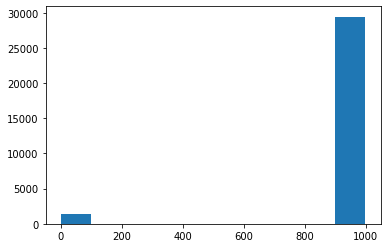

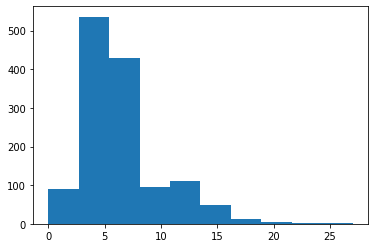

In [22]:
def drawhist(df,feature):
    plt.hist(df[feature])
drawhist(df,'pdays')
plt.show()

plt.hist(df.loc[df.pdays != 999, 'pdays'])
plt.show()

Obtained too much value '999', assumed the value as missing value, then changed to categorical variable

In [23]:
df['pdays_missing'] = 0
df['pdays_less_5'] = 0
df['pdays_greater_15'] = 0
df['pdays_bet_5_15'] = 0
df['pdays_missing'][df['pdays']==999] = 1
df['pdays_less_5'][df['pdays']<5] = 1
df['pdays_greater_15'][(df['pdays']>15) & (df['pdays']<999)] = 1
df['pdays_bet_5_15'][(df['pdays']>=5)&(df['pdays']<=15)]= 1

Drop duration and pdays columns

In [24]:
col = ['duration', 'pdays']
df.drop(col, axis=1,inplace=True)

View the top 5 rows of dataset

In [25]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0


Encode categorical variables with label encoder

In [26]:
object_cols = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']
label_encoder = LabelEncoder()
for col in object_cols:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15
0,56,3,1,0,0,0,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
2,37,7,1,3,0,1,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
3,40,0,1,1,0,0,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
4,56,7,1,3,0,0,1,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
6,59,0,1,5,0,0,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0


View header list

In [27]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'pdays_missing', 'pdays_less_5',
       'pdays_greater_15', 'pdays_bet_5_15'], dtype=object)

Make def code for visualization

In [28]:
def drawheatmap(df):
    '''Builds the heat map for the given data'''
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(df.corr(method='spearman'), annot=False, cmap='coolwarm')
    
def drawhist(df,feature):
    '''Draws an histogram for a feature in a data frame (df)'''
    plt.hist(df[feature])

def functionreplace(df,fea,val1,val2):
    '''Replaces value (val1) with value (val2) in the data frame (df) for a feature (fea)'''
    df[fea].replace(val1,val2)
    return df

def drawbarplot(df,x,y):
    '''Draws a bar plot for a given feature x and y in a data frame'''
    sns.barplot(x=x, y=y, data=df)
    

Make heat map for clean data

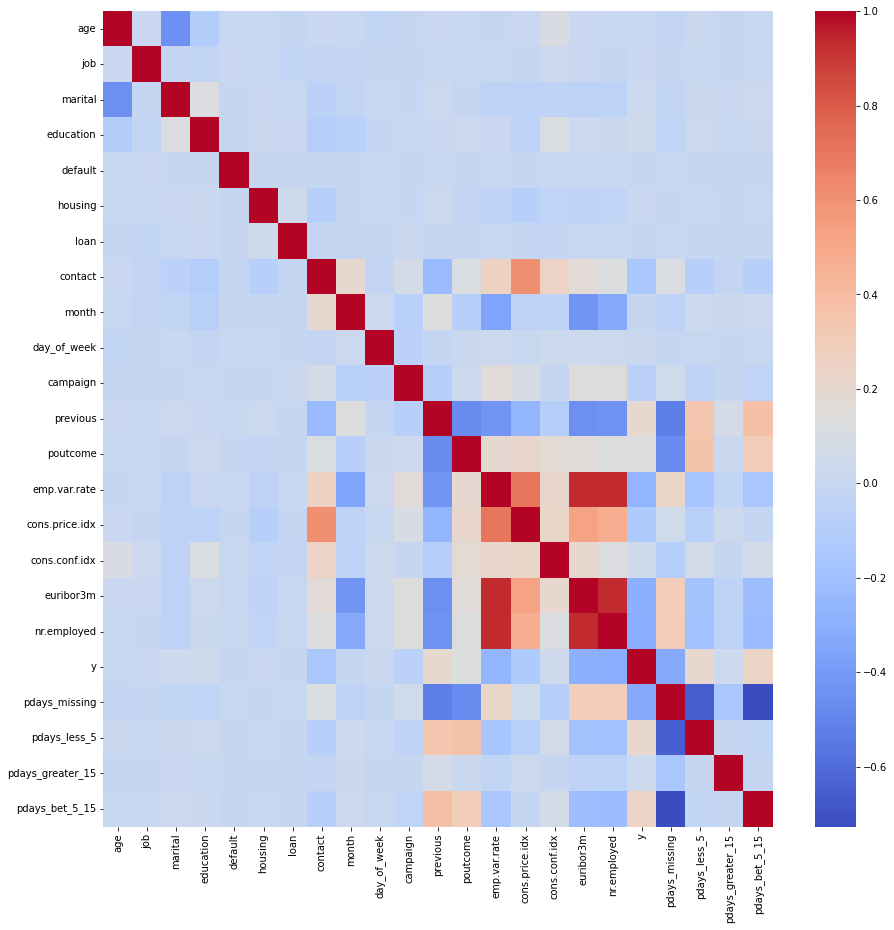

In [29]:
drawheatmap(df)

Initialize the clean data

In [30]:
df_clean = df

## Data Partition & SMOTE

Create partition data for modelling

In [31]:
from sklearn.model_selection import train_test_split

##partition data into data training and data testing
train,test = train_test_split(df_clean,test_size = 0.20 ,random_state = 111)
    
##seperating dependent and independent variables on training and testing data
train_X = train.drop(labels='y',axis=1)
train_Y = train['y']
test_X  = test.drop(labels='y',axis=1)
test_Y  = test['y']

Overcoming data imbalance with SMOTE

In [32]:
from imblearn.over_sampling import SMOTE

#handle imbalance class using oversampling minority class with smote method
os = SMOTE(sampling_strategy='minority',random_state = 123,k_neighbors=5)
train_smote_X,train_smote_Y = os.fit_resample(train_X,train_Y)
train_smote_X = pd.DataFrame(data = train_smote_X,columns=train_X.columns)
train_smote_Y = pd.DataFrame(data = train_smote_Y)

## Modelling

For modelling, we are going to use 6 different algorithm to find which has the best evaluation model. The algorithm are Logistic Regression, K-Nearest Neightbors, Support Vector Machine, Decision Tree, Random Forest, Naive Bayes. Reason why we use those algorithm is because our case is a classification, and those algorithm is a classification models in machine learning.

Import the libraries that we going to use.

In [33]:
from sklearn.model_selection import GridSearchCV


### Logistic Regression

Import the libraries that we going to use.

In [34]:
from sklearn import linear_model, decomposition
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

Initialize parameter of LogReg model

In [35]:
model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Fit the model with train smote data

In [36]:
model.fit(train_smote_X, train_smote_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Show intercept and coefficient of model

In [37]:
print(model.intercept_, model.coef_)

[-0.00149092] [[ 1.78229133e-03  2.12315580e-03  9.78046460e-02  2.62704855e-02
  -3.74128176e-02 -3.69724439e-02  3.44071400e-02 -9.23200525e-01
  -1.02926182e-01  7.11439582e-02 -6.40813366e-02 -2.92759721e-01
   4.20227937e-01 -9.30196367e-01  7.27217537e-01 -8.53632021e-04
   8.14157597e-01 -1.36127853e-02 -1.03356379e+00  3.73400819e-01
  -2.16340625e-02  6.80306108e-01]]


Make prediction for test data

In [38]:
pred1 = model.predict(test_X)

Evaluate the model with confusion matrix

In [39]:
confusion_matrix(test_Y, pred1)

array([[4393,  944],
       [ 275,  545]])

Evaluate the model with accuracy score

In [40]:
from sklearn.metrics import accuracy_score
print("Accuracy for Logistic Regression: ",
      accuracy_score(test_Y,pred1))

Accuracy for Logistic Regression:  0.8020139678414813


### K-Nearest Neighbors

Import the libraries that we going to use.

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

Initialize the parameters for tuning hyperparameter grid search CV 

In [42]:
# grid_param2 = {
#    'n_neighbors': [5,15,35], 
#    'weights': ['uniform', 'distance'], 
#    'metric': ['euclidean','manhattan']
#    }

Fit the model with tuning hyperparameter grid search CV to get optimal parameter.

In [43]:
# gs2 = GridSearchCV(estimator=knn,
#                      param_grid=grid_param2,
#                      scoring='accuracy',
#                      cv=3)
# gs2.fit(train_smote_X,train_smote_Y)
# best_parameters2 = gs2.best_params_
# print(best_parameters2)

Found the best parameters are metric='manhattan',n_neighbors=5, weights='distance. To shorten the time, we do modeling with optimal parameters obtained earlier.

In [44]:
model2 = KNeighborsClassifier(metric='manhattan',n_neighbors=5, weights='distance')

Fit the model with train smote data

In [45]:
model2.fit(train_smote_X, train_smote_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

Make prediction for test data

In [46]:
pred2=model2.predict(test_X)

Evaluate the model with accuracy score

In [47]:
from sklearn.metrics import accuracy_score
print("Accuracy for KNN: ",
      accuracy_score(test_Y,pred2))

Accuracy for KNN:  0.7995777164203346


Evaluate the model with confusion matrix

In [48]:
CF2=confusion_matrix(test_Y, pred2)
CF2

array([[4515,  822],
       [ 412,  408]])

### Support Vector Machine

Import the libraries that we going to use.

In [49]:
from sklearn.svm import SVC
from sklearn import svm 
esviem = SVC()

Initialize the model

In [50]:
clf = svm.SVC(kernel='linear')

Fit the model with train smote data

In [51]:
clf.fit(train_smote_X,train_smote_Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Make prediction for test data

In [52]:
pred3=clf.predict(test_X)

Evaluate the model with confusion matrix

In [53]:
CF3=confusion_matrix(test_Y, pred3)
CF3

array([[4639,  698],
       [ 329,  491]])

Evaluate the model with accuracy score

In [54]:
print("Accuracy for SVM: ",
      accuracy_score(test_Y,pred3))

Accuracy for SVM:  0.8331979860321586


### Decision Tree

Import the libraries that we going to use.

In [55]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()

Initialize the parameters for tuning hyperparameter grid search CV

In [56]:
# grid_param4 = {
#    'max_depth': [10,20,100],  
#    'criterion': ['gini','entropy']
#    }

Fit the model with tuning hyperparameter grid search CV to get optimal parameter.

In [57]:
# gs4 = GridSearchCV(estimator=dec_tree,
#                      param_grid=grid_param4,
#                      scoring='accuracy',
#                      cv=3)
# gs4.fit(train_smote_X,train_smote_Y)
# best_parameters4 = gs4.best_params_
# print(best_parameters4)

Found the best parameters are criterion='entropy',max_depth=100. To shorten the time, we do modeling with optimal parameters obtained earlier.

In [58]:
model4 = DecisionTreeClassifier(criterion='entropy',max_depth=100)
model4.fit(train_smote_X,train_smote_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=100, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Make prediction for test data

In [59]:
pred4=model4.predict(test_X)

Evaluate the model with accuracy score

In [60]:
print("Accuracy for Decision Tree: ",
      accuracy_score(test_Y,pred4))

Accuracy for Decision Tree:  0.8284878999512749


Evaluate the model with confusion matrix

In [61]:
CF4=confusion_matrix(test_Y, pred4)
CF4

array([[4801,  536],
       [ 520,  300]])

### Random Forest

Import the libraries that we going to use.

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=123)

Initialize the parameters for tuning hyperparameter grid search CV

In [63]:
# param_grid = { 
#     'n_estimators': [200, 1000],
#     'max_features': ['auto','log2'],
#     'criterion' :['entropy','gini']
# }

Fit the model with tuning hyperparameter grid search CV to get optimal parameter.

In [64]:
# CV_rfc = GridSearchCV(estimator=rfc, 
#                       param_grid=param_grid, 
#                       cv= 3)
# CV_rfc.fit(train_smote_X, train_smote_Y)
# best_parameters5 = CV_rfc.best_params_
# print(best_parameters5)

Found the best parameters are criterion='entropy',max_features='auto',n_estimators=1000. To shorten the time, we do modeling with optimal parameters obtained earlier.

In [65]:
model5 = RandomForestClassifier(criterion='entropy',max_features='auto',n_estimators=1000)
model5.fit(train_smote_X,train_smote_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Make prediction for test data

In [66]:
pred5=model5.predict(test_X)

Evaluate the model with accuracy score

In [67]:
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest: ",accuracy_score(test_Y,pred5))

Accuracy for Random Forest:  0.8764008445671593


Evaluate the model with confusion matrix

In [68]:
from sklearn.metrics import confusion_matrix
CF=confusion_matrix(test_Y, pred5)
CF

array([[5120,  217],
       [ 544,  276]])

### Naive Bayes

Import the libraries that we going to use.

In [69]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

Fit the model with train smote data

In [70]:
gnb.fit(train_smote_X, train_smote_Y)

GaussianNB(priors=None, var_smoothing=1e-09)

Make prediction for test data

In [71]:
pred6 = gnb.predict(test_X)

Evaluate the model with accuracy score

In [72]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy for Naive Bayes:",metrics.accuracy_score(test_Y, pred6))

Accuracy for Naive Bayes: 0.8172811434140004


Evaluate the model with confusion matrix

In [73]:
from sklearn.metrics import confusion_matrix
CF6=confusion_matrix(test_Y, pred6)
CF6

array([[4584,  753],
       [ 372,  448]])

## Conclusions

In [74]:
print("Accuracy for Logistic Regression: ",
      accuracy_score(test_Y,pred1))
print("Accuracy for KNN: ",
      accuracy_score(test_Y,pred2))
print("Accuracy for SVM: ",
       accuracy_score(test_Y,pred3))
print("Accuracy for Decision Tree: ",
      accuracy_score(test_Y,pred4))
print("Accuracy for Random Forest: ",
      accuracy_score(test_Y,pred5))
print("Accuracy for Naive Bayes:",
      metrics.accuracy_score(test_Y, pred6))

Accuracy for Logistic Regression:  0.8020139678414813
Accuracy for KNN:  0.7995777164203346
Accuracy for SVM:  0.8331979860321586
Accuracy for Decision Tree:  0.8284878999512749
Accuracy for Random Forest:  0.8764008445671593
Accuracy for Naive Bayes: 0.8172811434140004


We get the best accuration model is Random Forest model. So for deployment, I recommend to use Random Forest model to predict customer bank in the future.